<a href="https://colab.research.google.com/github/yanglinjing/vmor/blob/master/Copy_of_Credit_Card_Fraud_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All the documents are stored on Google Drive.
# It requires authorisation before use them.
# This chunk of code is about authorisation.

# Mounting Google Drive locally
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#google colab - change path to google drive

import os 
os.chdir('gdrive/My Drive/Colab Notebooks/vmor_practicum/credit_card_fraud')
!pwd

/content/gdrive/My Drive/Colab Notebooks/vmor_practicum/credit_card_fraud


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

# '/device:GPU:0' 
#  GPU is working

''

In [1]:
# Import libraries

import numpy as np
import pandas as pd
from time import time #Return the time in seconds

from keras.models import Sequential,clone_model, Model
from keras.layers import Bidirectional, LSTM, GRU, Embedding, SpatialDropout1D, Flatten, Concatenate, Dropout, MaxPool1D, Input, Reshape
from keras.layers.core import Dense, Activation, Dropout
from keras.backend import expand_dims

from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


其中，Sequential用于构建序贯模型，它可以由多个网络层进行线性堆叠。Bidirectional是双向神经网络结构，Dense就是我们所说的一层全连接神经网络，activation是激活函数，dropout是选择层后连接的神经元数，以避免过拟合 

# 导入数据

In [ ]:
X_train_final = pd.read_csv('data/dl/x_train.csv')
X_test_final = pd.read_csv('data/dl/x_test.csv')

y_train = pd.read_csv('data/dl/y_train.csv')
y_test = pd.read_csv('data/dl/y_test.csv')

In [ ]:
X_train_final.shape

(911710, 49)

In [ ]:
X_train_final.head()

,TransactionAmt,ProductCD,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V279,V280,V284,V285,V286,V287,V290,V291,V292,V293,V294,V295,V297,V298,V299,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V316,V317,V318,V319,V320,V321
0,0.421691,W,0.219049,0.164013,0.160324,0.0,0.0,0.000000,0.089781,0.0,0.0,0.129515,0.0,0.136178,0.085919,0.137688,0.151211,0.102218,0.100697,0.0,0.000000,0.0,0.0,0.114981,0.064677,0.079697,0.102408,0.096807,0.101425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337323,0.329025,0.337323,0.0,0.000000,0.0,0.000000,0.341714,0.331366,0.340248,0.0,0.0,0.0
1,0.450709,W,0.498370,0.538771,0.537121,0.0,0.0,0.807006,0.567586,0.0,0.0,0.804219,0.0,0.526621,0.000000,0.770045,0.604844,0.000000,0.100697,0.0,0.455583,0.0,0.2,0.000000,0.064677,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.535118,0.404482,0.0,0.582780,0.0,0.429672,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.405341,W,0.945086,0.082007,0.080162,0.0,0.0,0.000000,0.089781,0.0,0.0,0.129515,0.0,0.085919,0.000000,0.086871,0.095403,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.450709,W,0.710497,0.164013,0.127054,0.0,0.0,0.118326,0.179561,0.0,0.0,0.205277,0.0,0.136178,0.000000,0.288581,0.190807,0.000000,0.000000,0.0,0.240694,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.325539,0.000000,0.0,0.354534,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.381051,W,0.970378,0.082007,0.080162,0.0,0.0,0.000000,0.089781,0.0,0.0,0.000000,0.0,0.085919,0.000000,0.086871,0.095403,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
X_train_final['ProductCD'].value_counts()

W    541108
C    225053
R     61230
H     60337
S     23982
Name: ProductCD, dtype: int64

In [ ]:
X_train_final['ProductCD'] = X_train_final['ProductCD'].map({'W':1, 'C':2, 'R':3, 'H':4, 'S':5})

# 构建模型

## 没啥用的测试部分

In [ ]:
t = [[1, 2, 3],[4, 5, 6]]

In [ ]:
tf.expand_dims(t, 0)

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6]]], dtype=int32)>

In [ ]:
a = expand_dims(t, axis=0)

In [ ]:
a

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6]]], dtype=int32)>

In [ ]:
c = Flatten()(a)
c

<tf.Tensor 'flatten_10/Reshape:0' shape=(1, 6) dtype=int32>

在keras中，数据是以张量的形式表示的，张量的形状称之为shape，表示从最外层向量逐步到达最底层向量的降维解包过程。比如，一个一阶的张量[1,2,3]的shape是(3,);
一个二阶的张量[[1,2,3],[4,5,6]]的shape是(2,3);一个三阶的张量[[[1],[2],[3]],[[4],[5],[6]]]的shape是(2,3,1)。

In [ ]:
model_1 = Sequential([
                    Embedding(5, 3, input_length=1), #输入的一个类型变量，有5种值，因为只有一个分类变量，所以长度1
                    SpatialDropout1D(0.1),
                    Flatten(),

])

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 3)              15        
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1, 3)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_copy = clone_model(model_1)

In [ ]:
model_copy.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1, 3)              15        
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 1, 3)              0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
merged = Concatenate([model, model_copy])

In [ ]:
merged.add(Dropout(0.1))

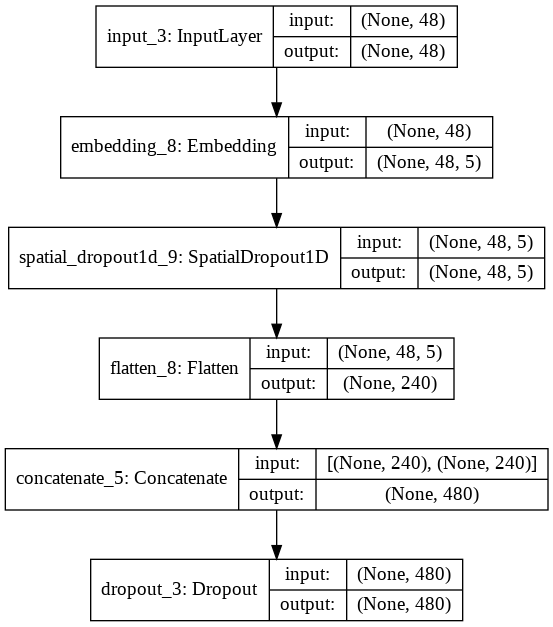

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
# Check Layers

for layer in model.layers:
    print(layer.output_shape)


(None, 911710, 1)
(None, 911710, 1)
(None, 911710)


In [ ]:
# Categorical Features

input_c = Input(shape=(1,))

c  = Embedding(5, 3, input_length=1)(input_c)

#c = SpatialDropout1D(0.1)(c)

c = Flatten(input_shape=(None, 1, 3))(c)
c

<tf.Tensor 'flatten_10/Reshape:0' shape=(None, None) dtype=float32>

In [ ]:
sequential.add(Embedding(max_features, embedding_size, input_length=maxlen))
sequential.add(Reshape((1, maxlen, embedding_size)))

In [ ]:
input_c = Input(shape=(12,))

In [ ]:
c  = Embedding(5, 3, input_length=12)(input_c) #只有1个分类变量，有5种不同值。每个值的output是用3个数字表示。
c

<tf.Tensor 'embedding_11/embedding_lookup/Identity_1:0' shape=(None, 12, 3) dtype=float32>

In [ ]:
c = SpatialDropout1D(0.1)(c)
c

<tf.Tensor 'spatial_dropout1d_6/cond/Identity:0' shape=(None, 12, 3) dtype=float32>

In [ ]:
#c = expand_dims(c, axis=1)
c

In [ ]:
#c = Flatten()(c)
c = Reshape((-1,36))(c)
c

<tf.Tensor 'reshape_9/Reshape:0' shape=(None, None, 36) dtype=float32>

In [ ]:
#c = expand_dims(c, axis=0)
c

<tf.Tensor 'ExpandDims_16:0' shape=(1, None, None) dtype=float32>

In [ ]:
c = Concatenate()([c, c])
c

<tf.Tensor 'concatenate_2/concat:0' shape=(None, None, 72) dtype=float32>

In [ ]:
c = Dropout(0.1)(c) # rate=?
c

<tf.Tensor 'dropout_2/cond/Identity:0' shape=(None, None, 72) dtype=float32>

In [ ]:
c = SpatialDropout1D(0.1)(c) # Input: A 3D Tensor
c

<tf.Tensor 'spatial_dropout1d_7/cond/Identity:0' shape=(None, None, 72) dtype=float32>

In [ ]:
model = Model(inputs=input_c, outputs=c)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 12)           0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 12, 3)        15          input_11[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_6 (SpatialDro (None, 12, 3)        0           embedding_11[0][0]               
__________________________________________________________________________________________________
reshape_9 (Reshape)             (None, 1, 36)        0           spatial_dropout1d_6[0][0]        
____________________________________________________________________________________________

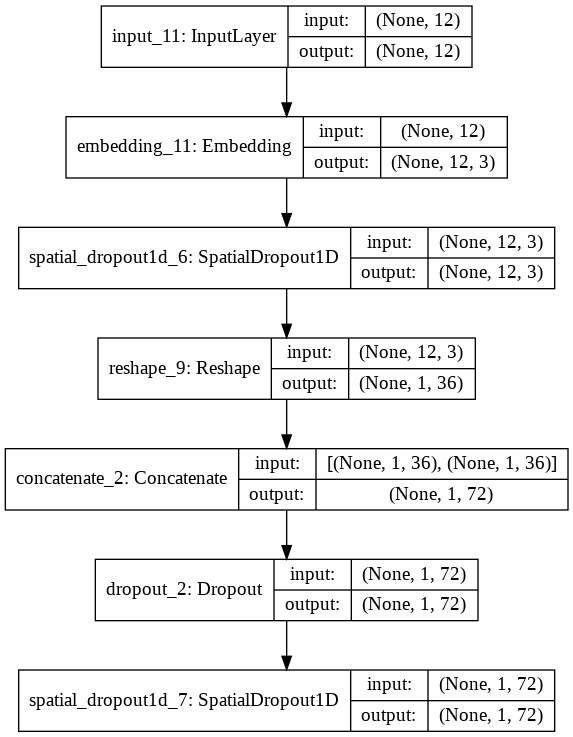

In [ ]:
plot_model(model,show_shapes=True)

## 模型第一部分

In [3]:
input_c = Input(shape=(1,))
c  = Embedding(5, 3, input_length=1)(input_c) #只有1个分类变量，有5种不同值。每个值的output是用3个数字表示。
c = SpatialDropout1D(0.1)(c)
c = Reshape((-1,3))(c) # Flatten
c = Concatenate()([c, c])
c = Dropout(0.1)(c) # rate=?
c = SpatialDropout1D(0.1)(c) # Input: A 3D Tensor

In [5]:
model = Model(inputs=input_c, outputs=c)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 3)         15          input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 1, 3)         0           embedding_1[0][0]                
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 3)         0           spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

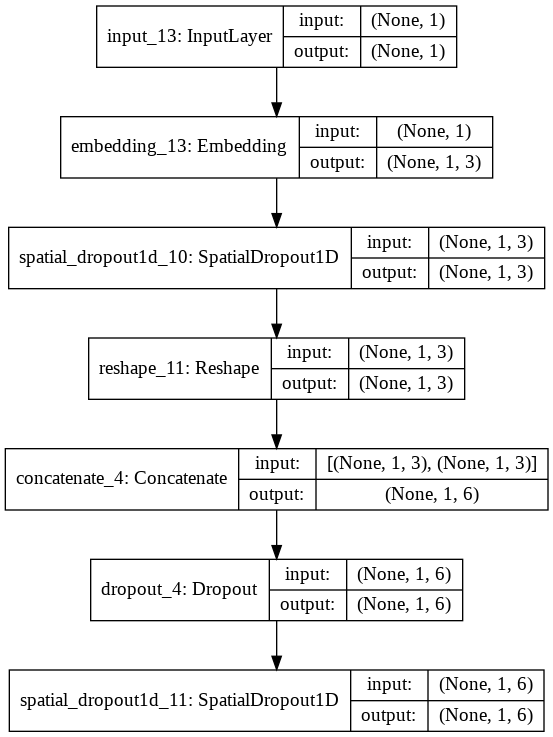

In [ ]:
plot_model(model,show_shapes=True)

## 双向部分


In [6]:
# BiLSTM 无用
c_ls = LSTM(64, return_sequences=True)(c) # unit = ?
#c_ls = Bidirectional(c_ls)

<tf.Tensor 'lstm_1/transpose_1:0' shape=(None, None, 64) dtype=float32>

In [10]:
# BiLSTM
c_ls = Bidirectional(LSTM(128,return_sequences=True),merge_mode='concat')(c)
c_ls = MaxPool1D(pool_size=2, strides=None, padding='valid')(c_ls)

In [12]:
# BiGru
c_gru = Bidirectional(LSTM(128,return_sequences=True), merge_mode='concat')(c)
c_gru = MaxPool1D(pool_size=2, strides=None, padding='valid')(c_gru)

In [13]:
# Concatenation
c = Concatenate()([c_ls, c_gru])

In [14]:
model = Model(inputs=input_c, outputs=c)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 3)         15          input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 1, 3)         0           embedding_1[0][0]                
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 3)         0           spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

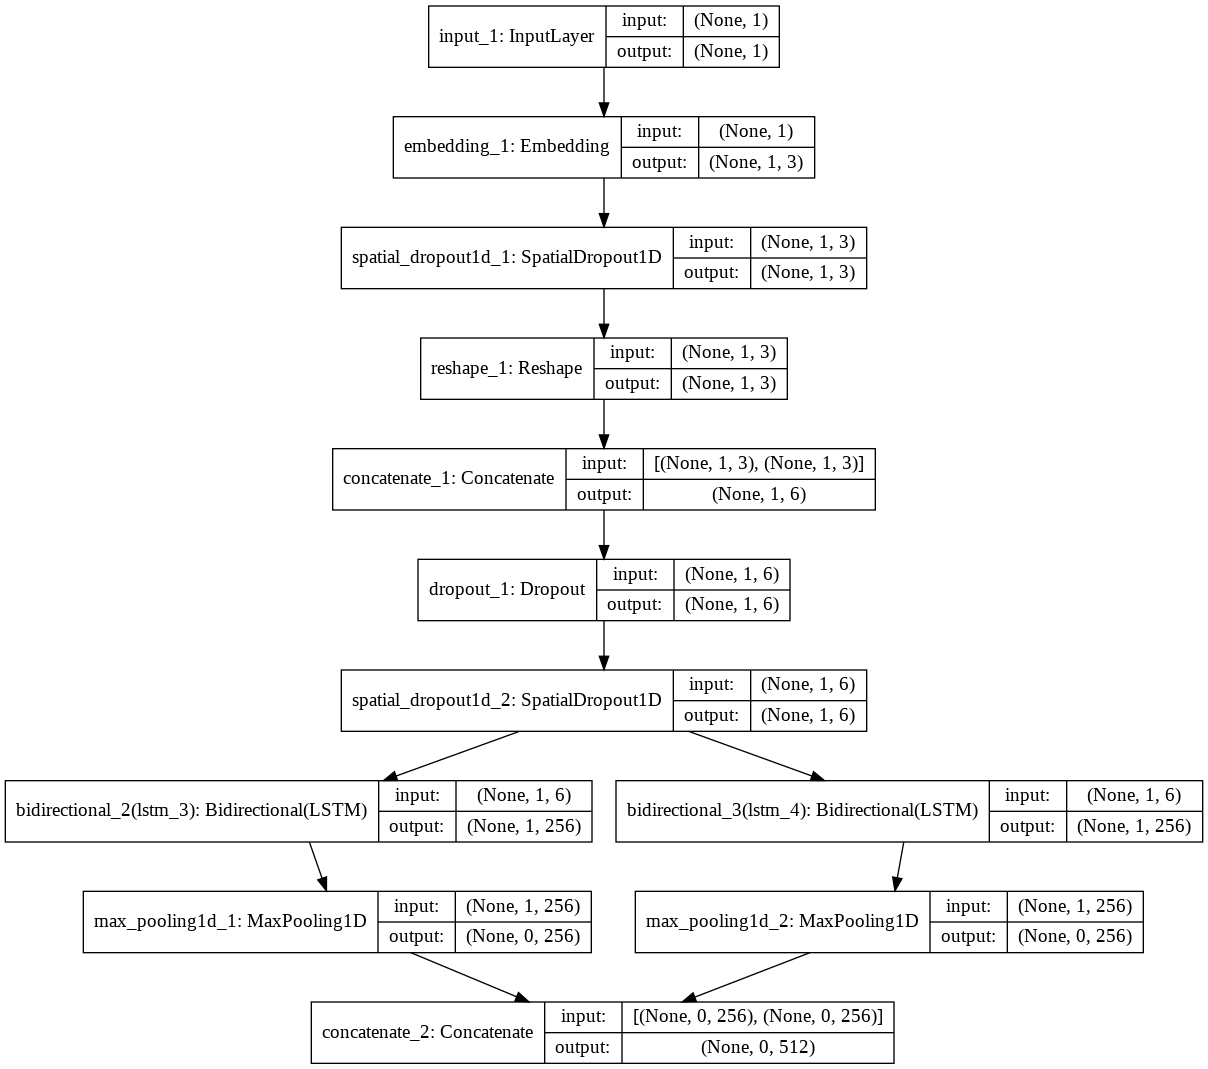

In [15]:
plot_model(model,show_shapes=True)

In [ ]:
# BiLSTM
c_ls = LSTM(64, return_sequences=True)(c) # unit = ?
c_ls = Bidirectional(c_ls, merge_mode='concat')
c_ls = MaxPool1D(pool_size=2, strides=None, padding='valid')(c_ls)

# BiGRU
c_gru = LSTM(4)(c) # unit = ?
c_gru = Bidirectional(c_gru, merge_mode='concat')
c_gru = MaxPool1D(pool_size=2, strides=None, padding='valid')(c_gru)

# Concatenation
c = Concatenate()([c_ls, c_gru])

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding
from keras.layers import Dense, LSTM, Bidirectional
from keras import backend as K
K.clear_session()

In [ ]:
# Categorical 

VOCAB_SIZE = 5
EMBED_DIM = 5
HIDDEN_SIZE = 64

# input layer
x1 = Input(shape=(100,), dtype='int32')

embedding = Embedding(VOCAB_SIZE, EMBED_DIM)(x1)
c = SpatialDropout1D(0.1)(embedding)
#c = Flatten()(c)
c = Concatenate()([c, c])
c = Dropout(0.1)(c) # rate=?
c = SpatialDropout1D(0.1)(c) # Input: A 3D Tensor

# BiLSTM layer
bi_lstm = Bidirectional(LSTM(HIDDEN_SIZE, return_sequences=True))(c)
bi_lstm = MaxPool1D(pool_size=2, strides=None, padding='valid')(bi_lstm)

# BiGRU
bi_gru = Bidirectional(GRU(HIDDEN_SIZE, return_sequences=True))(c)
bi_gru = MaxPool1D(pool_size=2, strides=None, padding='valid')(bi_gru)

categorical = Concatenate()([bi_lstm, bi_gru])

In [ ]:
# Numerical

x2 = Input(shape=(32,))
hidden1 = Dense(10, activation='relu')(x2)
num = Dropout(0.1)(hidden1)

In [ ]:
merge = Concatenate()([categorical, num])

ValueError: ignored

In [ ]:
# prediction layer
output = Dense(10, activation='softmax')(merge)
model = Model(inputs=x, outputs=output)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 5)       25          input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_3 (SpatialDro (None, 100, 5)       0           embedding_2[0][0]                
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 100, 10)      0           spatial_dropout1d_3[0][0]        
                                                                 spatial_dropout1d_3[0][0]  

# 结果进行拟合

其中batch_size是每次梯度更新的样本数，未写明则为32。

值得说明一下的是batch_size这个参数的坑有点深，我看了好久才理解，它主要的作用其实是用较少的样本获得合适的优化模型的梯度方向，避免全样本迭代时过高的内存占用；

epochs是指训练模型迭代次数，可以理解为我们遍历了一次所有的模型，则为1次epoch；（在keras1.*版本中的时候用的是nb_epoch，意义一样）

validation_split代表将数据集中多少数据用作验证集的训练数据的比例，这里选择5%的结果进行验证[2]。

In [ ]:
model.fit(X_train,y_train,batch_size=10,nb_epoch=100,validation_split=0.05)

查看模型的预测误差值，这样看准确率大概在88%，运用到生产上效果还是可以接受的。

In [ ]:
score2 = model.evaluate(X_test,y_test)
print(score2)